# Suman Pruthvi consumer finance company
Here we take loan applicaiton's for all type of loans.
Analysis the RISK and provide details about who can go as defaulters based on DRIVER variables or factors.

The intent is to reduce/aviod the CREDIT LOSS to the COMPANY.

# Data Sourcing and Data Understanding
### Data Sourcing:
Data has been sourced from UPGRAD as part of LENDING CLUB CASE study for the years distributed between 2007 till 2011.

Using this data the agenda is to find the driving factors which leads to charge-off from the applicants and causing CREDIT LOSS to the FIRM.

###  Variable / Column Understanding in Detail:

1. As part of 


# Starting with Data Cleaning

In [600]:
# IMPORT all the necessary libraries for LC analysis and visulization 
import numpy as np               #Importing Numpy library for any scientific calculations
import pandas as pd              #Importing pandas for Data Analysis
import matplotlib.pyplot as plt  #Importing Matplotlib for Data Visualization
#%matplotlib inline              #to clear cache plots to avoid any discripencencies on plots/graphs
import warnings                  # This will ignore some of the  warning messages
warnings.filterwarnings("ignore")# To ignore unwanted warnings

In [601]:
#Import the CSV file into data set
df = pd.read_csv('loan_data.csv')

In [602]:
#Identifying the columns having missing values w.r.t percentage
percentage_missing = df.isnull().sum()*100/len(df)
percentage_missing = round(percentage_missing,2)
percentage_missing.dtypes
missing_value_df = pd.DataFrame({'Column_names':df.columns,'percentage_missing':percentage_missing})
missing_value_df

,Column_names,percentage_missing
id,id,0.0
member_id,member_id,0.0
loan_amnt,loan_amnt,0.0
funded_amnt,funded_amnt,0.0
funded_amnt_inv,funded_amnt_inv,0.0
...,...,...
tax_liens,tax_liens,0.1
tot_hi_cred_lim,tot_hi_cred_lim,100.0
total_bal_ex_mort,total_bal_ex_mort,100.0
total_bc_limit,total_bc_limit,100.0


In [603]:
#Dropping the INDEX due to redundancy
missing_value_df.reset_index(drop=True,inplace=True) 

In [604]:
# Here the total nmber of missing columns with 100% elements are 54 columns
missing_column_100per = missing_value_df[missing_value_df.percentage_missing>=100].shape[0]
missing_column_100per

54

In [605]:
# To know the size of the original data frame 
df.shape
#Total rows 39717
#Total columns 111

(39717, 111)

In [606]:
# The total number of columns needed for analysis are 57
111-54

57

### Fixing ROWS and Columns

In [607]:
#Delete all columns where every element in th column is 'NULL'
#df1 is the new data frame after deleting the unwanted columns
df1 = df.dropna(axis='columns',how='all')

In [608]:
df1.shape
#After deleting the unwanted columns where all elements are NA
#Total rows 39717  --->No change in rows
#Total columns 57

(39717, 57)

In [609]:
# New DF is having 57 columns after dropping columns with ALL EMPTY Elements.
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [610]:
# Dropping ID column as its redundant
df1 = df1.drop(columns='id')
# Removing columns :"loan_amnt" & "funded_amnt" since the column:"funded_amnt_inv" is the one which applicant is going get finally
df1.drop(columns=['loan_amnt','funded_amnt'],inplace=True)
#Payment plan has all same values as "n" and of no use
df1.drop(columns=['pymnt_plan'],inplace=True)
#URL and Desc dosent have any relacvent values for out analysis.
df1.drop(columns=['url','desc'],inplace=True)
#Title is redundant with purpose and title values are too generic and hence dropping
df1.drop(columns=['title'],inplace=True)
#For sanctioning loans delinquished data is of no use.Hence dropping 
df1.drop(columns=['delinq_2yrs'],inplace=True)
#Revolving util has percentage about customer behavior variables.
df1.drop(columns=['revol_bal'],inplace=True)
# Since this column has redundant values as :"f". Not usefull column to retaain .Hence dropping
df1.drop(columns=['initial_list_status'],inplace=True)
# Most of the elements are EMPTY . We cannot impute or compute using any derivative metrics.Hence dropping.
df1.drop(columns=['next_pymnt_d'],inplace=True)
# All the value in these columns are ZERO or N/A not a usefull column. Hence dropping
df1.drop(columns=['collections_12_mths_ex_med'],inplace=True)
#Both the columns having redundant values and not usefull.Hence dropping .
df1.drop(columns=['policy_code','application_type'],inplace=True)



## Dropped 14 columns which are analysed to be redundant or not usefull for further analysis. 

In [611]:
# DF now has 43 columns to analyze after dropping unwanted 14 columns as said above.
df1.shape

(39717, 43)

In [612]:
# analyze dtypes and non-null values of each column.
# Here we get an idea on which coulumn is having NULL values if that column is consideerd as TARGET/Catagorical variable.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   funded_amnt_inv           39717 non-null  float64
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_title                 37258 non-null  object 
 8   emp_length                39717 non-null  object 
 9   home_ownership            39717 non-null  object 
 10  annual_inc                39717 non-null  float64
 11  verification_status       39717 non-null  object 
 12  issue_d                   39717 non-null  object 
 13  loan_status               39717 non-null  object 
 14  purpos

# Fixing Missing values

In [613]:
#Identify the missing values based on % 
df1.isnull().sum()*100/len(df)

member_id                    0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    6.191303
emp_length                   0.000000
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
purpose                      0.000000
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
earliest_cr_line             0.000000
inq_last_6mths               0.000000
mths_since_last_delinq      64.662487
mths_since_last_record      92.985372
open_acc                     0.000000
pub_rec                      0.000000
revol_util                   0.125891
total_acc                    0.000000
out_prncp   

In [614]:
#Dropping :"mths_since_last_delinq" & "mths_since_last_record" after above analysis.
# More than 60% of elements are missing .Better to drop rather than extrapolation.
df1.drop(columns=['mths_since_last_delinq','mths_since_last_record'],inplace=True)

In [615]:
df1.shape

(39717, 41)

In [616]:
df1.isnull().sum()*100/len(df)
# After filtering out the columns which HIGH number of missing(>50%).
# Below are the final DF columns for further analysis.

member_id                   0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
open_acc                    0.000000
pub_rec                     0.000000
revol_util                  0.125891
total_acc                   0.000000
out_prncp                   0.000000
out_prncp_inv               0.000000
total_pymnt                 0.000000
t

### As per above %  of missing valus : "emp_title" column can be neglected from analysis.
### Since the mising value % is very less for Col: "revol_util".
### Missing value imputation is performed on "revol_util" using mode value and removing % symbol to derive min/max and IQR.

In [617]:
#Use fillna to fill missing values with mode value form the same column: "revol_util"
df1.revol_util = df1.revol_util.fillna(df1.revol_util.mode()[0])

In [618]:
df1.revol_util = df1.revol_util.apply(lambda x : float(x[:-1]))

In [619]:
df1.revol_util.describe()

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [620]:
df1[df1.loan_status=='Charged Off'].revol_util.mean()

55.414094544162126

In [621]:
df1[df1.loan_status=='Charged Off'].revol_util.describe()

count    5627.000000
mean       55.414095
std        28.022277
min         0.000000
25%        34.300000
50%        58.200000
75%        78.950000
max        99.900000
Name: revol_util, dtype: float64

In [622]:
df1[df1.loan_status=='Charged Off'].revol_util.describe()

count    5627.000000
mean       55.414095
std        28.022277
min         0.000000
25%        34.300000
50%        58.200000
75%        78.950000
max        99.900000
Name: revol_util, dtype: float64

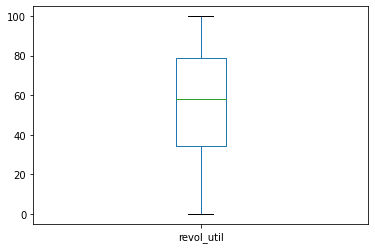

In [623]:
df1[df1.loan_status=='Charged Off'].revol_util.plot.box()

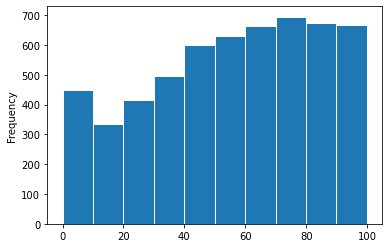

In [624]:
df1[df1.loan_status=='Charged Off'].revol_util.plot.hist(edgecolor='w')
#Based on below HISTOGRAM plot its evident that the number of "charged-off" applicants increases with "revol_util" % increment.
 

### Based on the above HISTOGRAM plot its evident that the number of "charged-off" applicants increases with "revol_util" % increment.

# Standardising Values

In [625]:
#Converting TERM column to NUMERIC with number of months alone.
df1.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [626]:
# To see number of each months type distribution
# Here its show 36 months borrowers are more compared with 60 months.
df1.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [627]:
df1.term.dtypes

dtype('O')

In [628]:
# function to remove months string from the column.
df1.term = df1.term.apply(lambda x : int(x[:3]) )

In [629]:
#value_counts will not have months string now 
df1.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [630]:
df1.term.unique()

array([36, 60])

In [631]:
df1.term.dtypes

dtype('int64')

In [632]:
df1.head()

,member_id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,4975.0,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,...,0.00,0.00,Jan-15,171.62,May-16,0,0.0,0,0.0,0.0
1,1314167,2500.0,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,0,0.0,0.0
2,1313524,2400.0,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,...,0.00,0.00,Jun-14,649.91,May-16,0,0.0,0,0.0,0.0
3,1277178,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,0,0.0,0.0
4,1311748,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,0.00,0.00,May-16,67.79,May-16,0,0.0,0,0.0,0.0


In [633]:
#For emp_length column try removing 'years' string
df1.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0            1075
Name: emp_length, dtype: int64

In [634]:
df1.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0'],
      dtype=object)

In [635]:
#We directly modified the string 'n/a' to '0' and usin below lambda functions to convert
#the elements to equavalent FLOAT values 
df1.emp_length = df1.emp_length.apply(lambda x : float(0.9) if x == '< 1 year' else x) 
df1.emp_length = df1.emp_length.apply(lambda x : float(10.0) if x == '10+ years' else x)
df1.emp_length = df1.emp_length.apply(lambda x : float(1.0) if x == '1 year' else x)
df1.emp_length = df1.emp_length.apply(lambda x : float(0.0) if x == '0' else x)
for i in [1,2,3,4,5,6,7,8,9]:
    df1.emp_length = df1.emp_length.apply(lambda x : float(x.split(' ')[0]) if x == str(i) + ' years' else x)

In [636]:
df1.emp_length.value_counts()
# Values 1.0 till 10.0 are the years of experience
# Where 0.9 is <1 Year and 10.0 is 10+ Years
# 0.0 represents mostly business or unemployed

10.0    8879
0.9     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
0.0     1075
Name: emp_length, dtype: int64

In [637]:
df1.emp_length.dtypes

dtype('float64')

In [638]:
df1.emp_length.dtypes

dtype('float64')

In [639]:
df1.emp_length
#emp_length is converted to be FLOAT values as years.

0        10.0
1         0.9
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.9
39715     0.9
39716     0.9
Name: emp_length, Length: 39717, dtype: float64

In [640]:
#After above data cleaning the number of ROWS stick to be the same as initial : 39717
df1.emp_length.shape

(39717,)

In [641]:
#Workin on loan_status column
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [642]:
#Fixing "int_rate" column by removing % symbol for further analysis
df1.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.15%      1
22.64%      1
16.01%      1
17.44%      1
18.72%      1
Name: int_rate, Length: 371, dtype: int64

In [643]:
df1.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [644]:
#Using this lambda function converting "int_rate" column to FLOAT values.
df1.int_rate = df1.int_rate.apply(lambda x : float(x[:-1]))

In [645]:
df1.int_rate.dtypes

dtype('float64')

In [646]:
df1.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [647]:
#With this describe step we can confirm "int_rate" is converted properly to float
df1.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [648]:
#Converting "issue_d" column to proper DATE format
#pd.to_datetime(df1.issue_d)
df1.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [649]:
#Correct the column "issue_d" to proper date time format
# Manipulation of strings and Date to correct date format
df1.issue_d = pd.to_datetime(df1.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [650]:
df1.issue_d.unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [651]:
# Derived Metric
#Creating new column ISSUED_YEAR:"issue_y" column for accomidating only YEAR using the existing column:"issue_d"
df1.issue_y = pd.DatetimeIndex(df1.issue_d).year

In [652]:
df1.issue_y.dtype

dtype('int64')

In [653]:
df1.issue_y.unique()

Int64Index([2011, 2010, 2009, 2008, 2007], dtype='int64', name='issue_d')

# 1: Problem Statement

## Identifying potential charged-off applicants to reduce "CREDIT LOSS" to the company, Using columns:"home_ownership/loan_status & funded_amnt_inv"



## Analysis Approach

- Using CONSUMER ATTRIBUTE's :"home_ownership" as an index column and applying GROUPBY on LOAN ATTRIBUTE: "loan_status" column.
- Finding the LOAN amount from charged-off category applicants by applying mean on "funded_amnt_inv".

In [654]:

pd.pivot_table(data=df1,index='home_ownership',columns='loan_status',values='funded_amnt_inv')

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,12534.848099,17669.228223,11356.479259
NONE,NaN,NaN,1592.686667
OTHER,9546.124229,NaN,6861.935402
OWN,9950.402801,14220.951805,9386.171501
RENT,9646.428774,14676.648628,9080.389198


## Analysis output  :

- As per above analysis the charged-off loan amount is more from MORTGAE category applicants compared with others.
- The tendency of giving higher LOAN using MORTGAGE is a +ve approach 
- As even if the applicant "CHARGE-OFF"(Run aways with out paying) there is always a gain from it.


# 2: Problem Statement

## To find what are the interest rates  CONSUMER BANK is gaining as per the type of LOAN Application..
### Ex: Loan Sanction based on category as : RENT/MORTGAGE/OWN/Other's

# Analysis Approach

- BIVERIATE ANALYSIS ON TWO VARIABLES:Continous and Catagorical
-  Using groupby on Catagorical column:"home_ownership" and plotting it against MEAN/MAX& MEDIAN of "int_rate" .

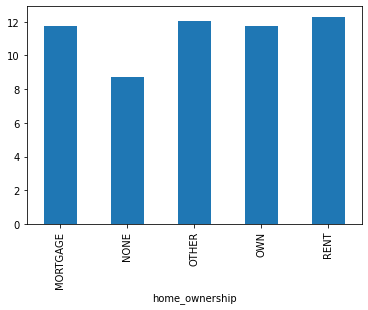

In [655]:
df1.groupby(['home_ownership'])['int_rate'].mean().plot.bar()

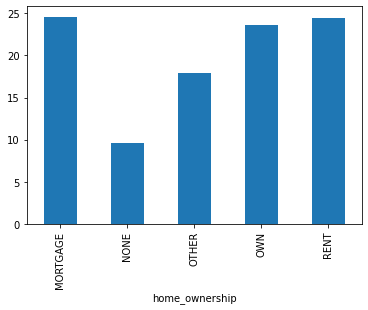

In [656]:
df1.groupby(['home_ownership'])['int_rate'].max().plot.bar()

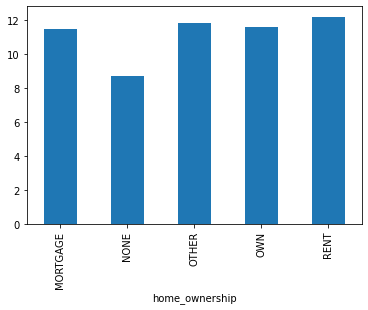

In [657]:
df1.groupby(['home_ownership'])['int_rate'].median().plot.bar()

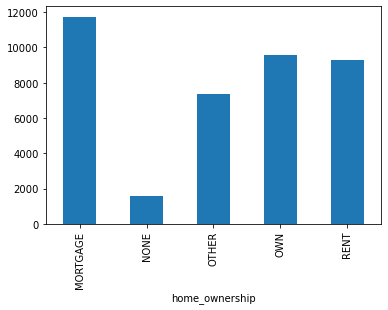

In [658]:
df1.groupby(['home_ownership'])['funded_amnt_inv'].mean().plot.bar()

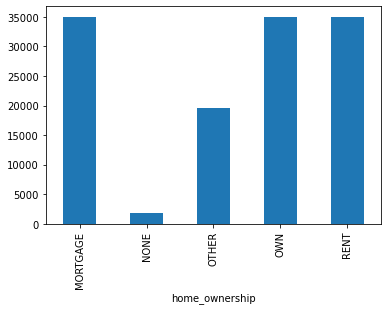

In [659]:
df1.groupby(['home_ownership'])['funded_amnt_inv'].max().plot.bar()

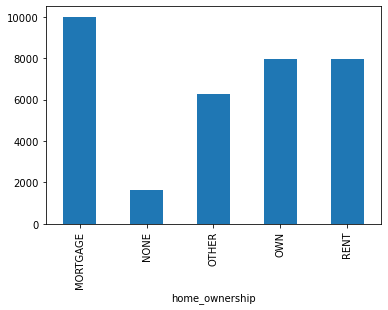

In [660]:
df1.groupby(['home_ownership'])['funded_amnt_inv'].median().plot.bar()

In [661]:
df1[df1.home_ownership=='NONE']

,member_id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39318,214993,1228.06,36,7.75,312.22,A,A3,ups,5.0,NONE,...,0.0,0.0,Feb-11,313.59,Jan-11,0,0.0,0,NaN,0.0
39659,121574,1925.00,36,9.64,128.41,B,B4,NaN,0.9,NONE,...,0.0,0.0,Sep-10,129.76,Aug-07,0,NaN,0,NaN,NaN
39660,121373,1625.00,36,8.70,88.65,B,B1,NaN,0.9,NONE,...,0.0,0.0,Sep-10,89.80,Aug-07,0,NaN,0,NaN,NaN


# Analysis output:

- As per the above BIVERIATE analysis
- The LOAN amount and the INTEREST rates given to NONE category applicants are less on an average, compard with
other category applicants.
- This looks like an approach to avoid charged-off applicants 
- When performing deep dive into the data to see NONE applicants . It observed that there are only THREE applicants part of that category.
- Instead of considering this type , its better to ignore as an OUTLIER's category.

In [662]:
#plt.figure(figsize=[10,10])   #REMOVE

In [663]:
import seaborn as sns

In [664]:
#sns.pairplot(df1[['int_rate','funded_amnt_inv']])  #REMOVE
#plt.show()

## 3: Problem Statement
### Finding out the  driving factor which is leading applicant's into CHARGED-OFF state, Using columns:''Charged Off/purpose/dti"

# Analysis Approach

### BI VERIATE ANALYSIS: col1:CHARGED-OFF && col2:purpose

- First by applying a filter to get CHARGED-OFF applicants data alone, using the categorical variable:"Charged Off"
- Using another categorical variable :"PURPOSE" derive value counts distribution.
- Applying BAR plot on the value_counts() gives us the spread on the driving factor ,Here its "purpose". 

In [665]:
#get dataframe for charged-off applicants alone: df2.
df2 = df1[df1.loan_status =='Charged Off']

In [666]:
#On the derived DATA FRAM:,df2 fetch spread of target variable using vlaue_counts.
#Since its a categorical variale to plot a graph its possible to do using value_counts.
df2.purpose.value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

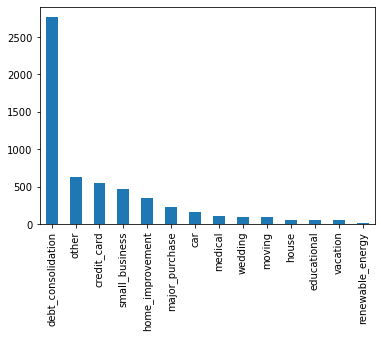

In [667]:
# Plotting the bar graph ideltifying the spread of driving_factor:purpose
df2.purpose.value_counts().plot.bar()

## Analysis Output:1

### Observed a pattern that , Purpose category of type:debt_consolidation/other/credit_card are having major share on charged_off  

In [668]:
#pd.pivot_table(data=df2,index='loan_status',columns='purpose',values='dti').plot.hist() #Remove

In [669]:
df2.dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [670]:

#df2.dti.value_counts().plot.bar()

In [671]:
df2["dti_bucket"] = pd.qcut(df1.dti, [0, 0.25, 0.50, 0.75, 1 ], ["L","M","H","VH"])

In [672]:
df2.dti_bucket.value_counts()

VH    1601
H     1489
M     1340
L     1197
Name: dti_bucket, dtype: int64

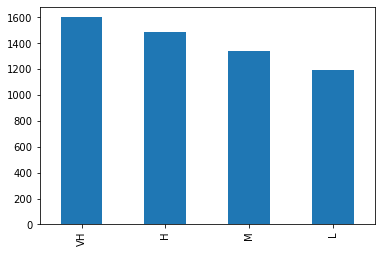

In [673]:
df2.dti_bucket.value_counts().plot.bar()

## Analysis Output:2
### As per the above PLOT the probability of charged-off applicants is increasing along with the raise in DTI ratio.

## 4: Problem Statement

### Analysing the number of 'charged-off' applicants w.r.t year of loan sanctioned.

In [674]:
df1.shape
#First analyse the shape of DF. Number of columns are 41

(39717, 41)

In [675]:
#Deriving a new derived variable('issue_year') of type "INTERVAL" from ('issue_year') column.
df1['issue_year'] = pd.DatetimeIndex(df1.issue_d).year

In [676]:
# After adding a new column 'issue_year' it becomes 42
df1.shape

(39717, 42)

In [677]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   member_id                 39717 non-null  int64         
 1   funded_amnt_inv           39717 non-null  float64       
 2   term                      39717 non-null  int64         
 3   int_rate                  39717 non-null  float64       
 4   installment               39717 non-null  float64       
 5   grade                     39717 non-null  object        
 6   sub_grade                 39717 non-null  object        
 7   emp_title                 37258 non-null  object        
 8   emp_length                39717 non-null  float64       
 9   home_ownership            39717 non-null  object        
 10  annual_inc                39717 non-null  float64       
 11  verification_status       39717 non-null  object        
 12  issue_d           

In [679]:
# Come up with a PIVOT TABLE:
# Filter all rows except 'Current' loan_status(Its not needed due to past data).
# Using charged-off and Fully-paid applicants as columns and loan_status as INDEX/GROUPBY .
# Applying SUM on funded_amnt_inv.
pd.pivot_table(data=df1[(df1['loan_status']!='Current')],index='issue_year',columns=['loan_status'],values='funded_amnt_inv',aggfunc=sum)
                                                                                                                                                                                                         
                                                                                                            

loan_status,Charged Off,Fully Paid
issue_year,,
2007,4.546256e+04,2.615134e+05
2008,6.370311e+05,4.401330e+06
2009,5.133978e+06,3.596280e+07
2010,1.457847e+07,9.901754e+07
2011,4.073972e+07,1.935748e+08


In [680]:
X = pd.pivot_table(data=df1[(df1['loan_status']!='Current')],index='issue_year',columns=['loan_status'],values='funded_amnt_inv',aggfunc=sum)
#Storing the data in X                                                                                                                                                                                                                        
                                                                                                            

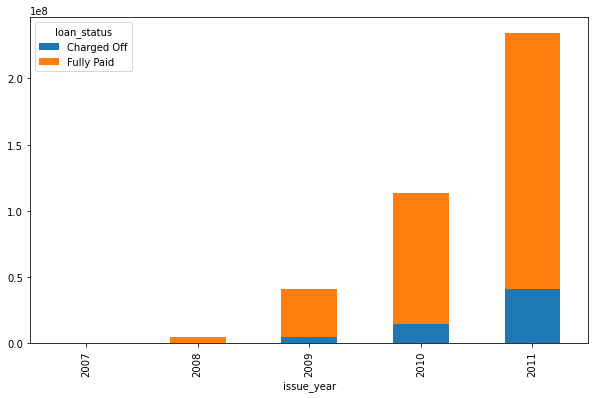

In [681]:
#Plottig a stacked plot on X DF.
X.plot(kind="bar", stacked="True", figsize=[10,6])

# Analysis Output: 4:1

- Observed that the LOAN amount is raising every year and charged-off and fully paid also raising equavellent.
- Charged off applicants are close to 1/4th of the fully paid applicants during 2011.Which is HIGH compared to other years.


In [682]:
# Deriving a PIVOT TABLE wrt YEAR and loan_status for funded amount SUM.
pd.pivot_table(data=df1[(df1['loan_status']!='Current')],index='loan_status',columns=['issue_year'],values='funded_amnt_inv',aggfunc='count')
                                                                                                                                                                                                                    
                                                                                                            

issue_year,2007,2008,2009,2010,2011
loan_status,,,,,
Charged Off,45,247,594,1485,3256
Fully Paid,206,1315,4122,10047,17260


In [683]:
Y=pd.pivot_table(data=df1[(df1['loan_status']!='Current')],index='loan_status',columns=['issue_year'],values='funded_amnt_inv',aggfunc='count')
#Storing thd data in Y                                                                                                                                                                                                                      
                                                                                                            

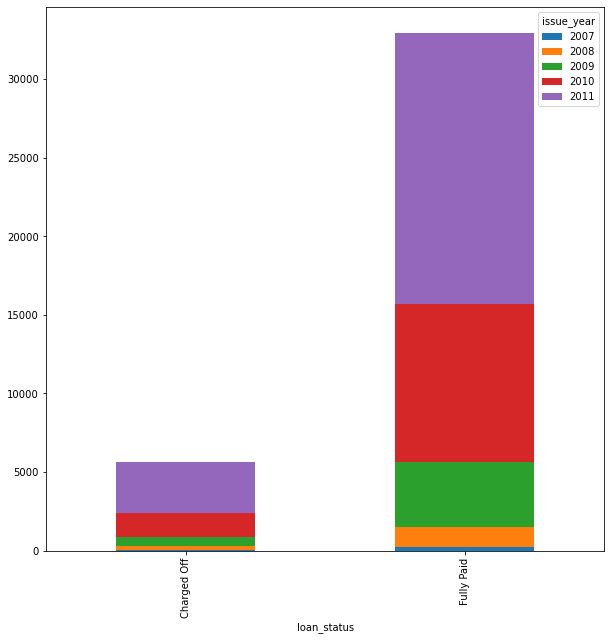

In [684]:
Y.plot(kind='bar',stacked='True',figsize=[10,10])
#Plottig stacked plot 

# Analysis Output:4:2

- Its observed that the number of applicants are raising every year which is +ve sign.
- Above anaylyis 4:1 is represented here with number of applicant's distribution.
- 2011 has more charged-off and fully-paid based on number of applicants.

In [685]:
Y
#Check teh DF Y

issue_year,2007,2008,2009,2010,2011
loan_status,,,,,
Charged Off,45,247,594,1485,3256
Fully Paid,206,1315,4122,10047,17260


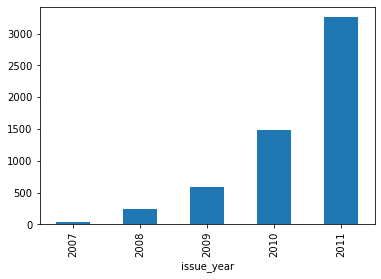

In [686]:
#Plotting a graph only to analyse charged-off applicants based on YEAR
Y.loc['Charged Off'].plot.bar()

# Analysis Output:4:3

## The number of charged-off applicants are evidenly clear that, They are growing every year more than 100%.

In [687]:
Z=pd.pivot_table(data=df1[(df1['loan_status']!='Current')],index='issue_year',columns=['loan_status'],values='term',aggfunc='count')
# Same analysis as 4:1 here its using count of applicants                                                                                                                                                                                                                       
                                                                                                            

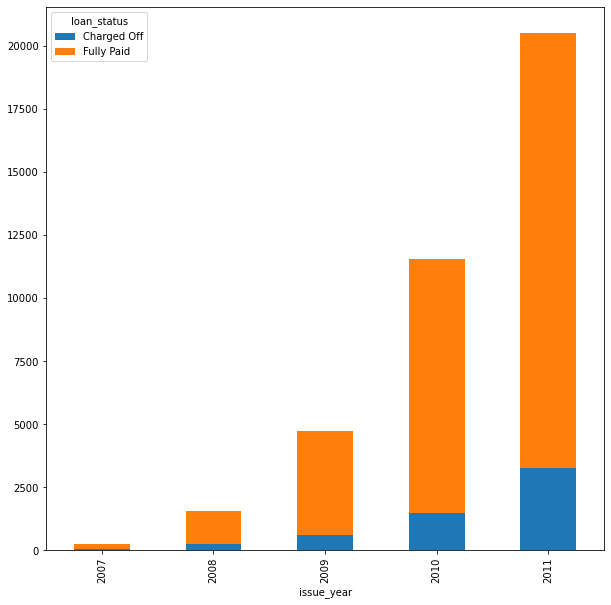

In [688]:
Z.plot(kind='bar',stacked='True',figsize=[10,10])

# Analysis output: 4:4

- To put some more emphasis to show charged-off applicants are growing every year as the number of applicants are raising every year.
- The same way, Fully paid are raising every year.
- But charged-off is seen to be close to 1/4th of fully paid in  2011.

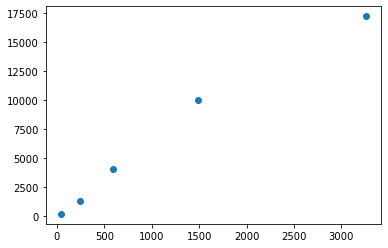

In [696]:
plt.scatter(Y.loc['Charged Off'],Y.loc['Fully Paid'])

In [697]:
# A scatter plto to show charged-off and fully-paid how linear they are.